In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
import io

In [14]:
nf = int(input("Ingrese el número de filas: "))
nc = int(input("Ingrese el número de columnas: "))
matrix = np.zeros((nf, nc, 3))

In [15]:
def branch_12(iv, jv, colores, ax):
    for j in range(colores.shape[1]):
        i = iv - abs(j-jv)
        if i >= 0:
            colores[i, j, :] = [0.5, 0.5, 1]
    ax.imshow(colores)

def branch_34(iv, jv, colores, ax):
    for j in range(colores.shape[1]):
        i = iv + abs(j-jv)
        if i < colores.shape[0]:
            colores[i, j, :] = [1, 0.5, 1]
    ax.imshow(colores)

def branch_23(iv, jv, colores, ax):
    for i in range(colores.shape[0]):
        j = jv - abs(i-iv)
        if j >= 0:
            colores[i, j, :] = [1, 0.5, 0.5]
    ax.imshow(colores)

def branch_14(iv, jv, colores, ax):
    for i in range(colores.shape[0]):
        j = jv + abs(i-iv)
        if j < colores.shape[1]:
            colores[i, j, :] = [1, 0.5, 0]
    ax.imshow(colores)

In [16]:
def graphic_(t, m):
    fig, ax = plt.subplots()

    # Crear una copia de la matriz de colores
    colores_copia = m.copy() / 255.0

    # Diagonal Principal
    start_row = t[0]
    start_col = t[1]
    while start_row < colores_copia.shape[0] and start_col < colores_copia.shape[1]:
        colores_copia[start_row, start_col, :] = [1, 0.5, 1]
        start_row += 1
        start_col += 1

    # Diagonal Secundaria
    start_row = t[0]
    start_col = t[1]
    while start_row < colores_copia.shape[0] and start_col >= 0:
        colores_copia[start_row, start_col, :] = [0.5, 0.5, 1]
        start_row += 1
        start_col -= 1

    # Resaltar la fila y columna
    fila_resaltada = t[0]
    colores_copia[fila_resaltada, :, :] = [1, 0.5, 0]
    columna_resaltada = t[1]
    colores_copia[:, columna_resaltada, :] = [1, 0.5, 0.5]

    # Mostrar el gráfico
    im = ax.imshow(colores_copia)
    plt.show()


Tupla:  (31, 32)


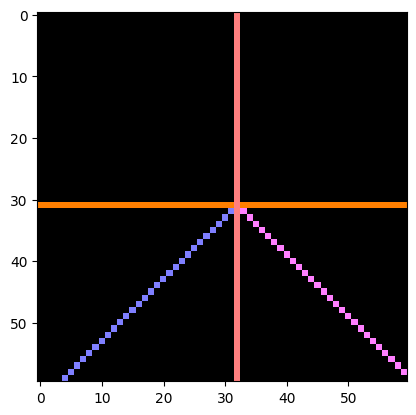

In [17]:
t = (np.random.randint(0, nf), np.random.randint(0, nc))
print("Tupla: ", t)
graphic_(t, matrix)
matrix = np.zeros((nf, nc, 3))

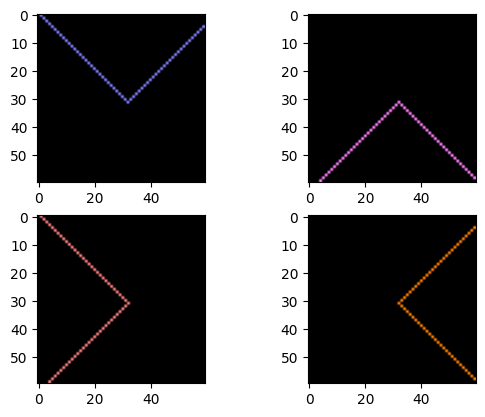

In [18]:
matrix = np.zeros((nf, nc, 3))
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2)

branch_12(t[0], t[1], matrix.copy(), ax1)
branch_34(t[0], t[1], matrix.copy(), ax2)
branch_23(t[0], t[1], matrix.copy(), ax3)
branch_14(t[0], t[1], matrix.copy(), ax4)

fig.savefig('branches.png', dpi=300, bbox_inches='tight')
plt.show()

TENSORES CON IMÁGENES

In [19]:
url = "https://png.pngtree.com/element_our/20190603/ourmid/pngtree-big-fist-gesture-illustration-image_1434619.jpg"

def obtain_image(url):
    # Obtener la imagen de la URL
    response = requests.get(url)
    image_bytes = io.BytesIO(response.content)
    # Abrir la imagen con PIL
    image = Image.open(image_bytes)
    # Convertir la imagen a un arreglo NumPy
    image_array = np.array(image)
    return image, image_array

img, img_array = obtain_image(url)
print("Dimensiones de la imagen: ", img_array.shape)

Dimensiones de la imagen:  (360, 360, 3)


In [20]:
#Crear una tupla con valores aleatorios de la imagen
t = (np.random.randint(0, img_array.shape[0]), np.random.randint(0, img_array.shape[1]))
print(t)
img, img_array = obtain_image(url)

(167, 20)


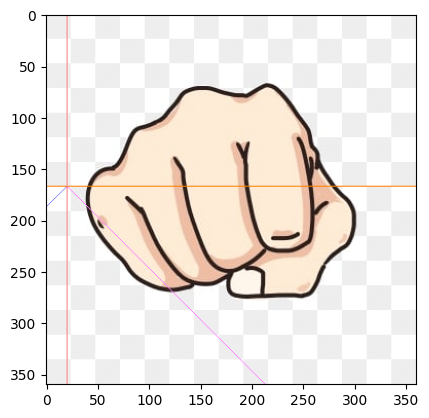

In [21]:
graphic_(t, img_array.copy())

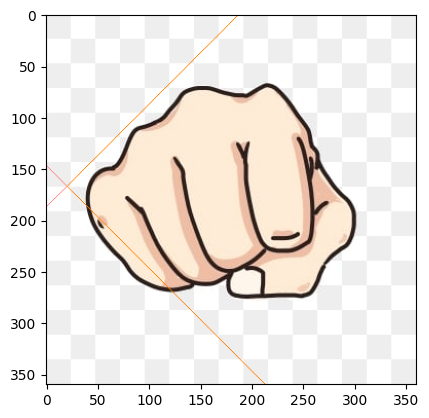

In [22]:
fig, ax5 = plt.subplots()
colores = img_array.copy() / 255.0  # Crear una copia normalizada de la imagen original
branch_12(t[0], t[1], colores, ax5)
branch_34(t[0], t[1], colores, ax5)
branch_23(t[0], t[1], colores, ax5)
branch_14(t[0], t[1], colores, ax5)

plt.show()

Figuras Triangulo rectangulo, Rectangulo, Rombo, Triangulo isoceles

Rectangulo

Dimensiones de la imagen:  (32, 32, 3)


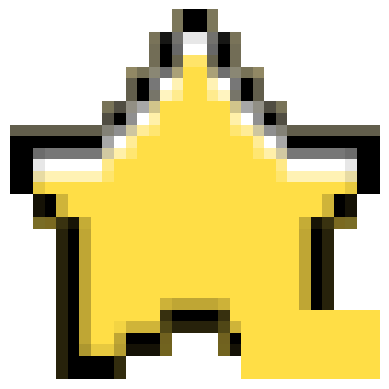

In [153]:
imagen = plt.imread("estrella (2).png")
imagen = imagen[:, :, :3]
print("Dimensiones de la imagen: ", imagen.shape)
nf, nc = imagen.shape[0], imagen.shape[1]

def cuadrado(i, j, matrix, start_row, start_col):
    matrix[i, j, :] = matrix[pos1, pos2, :]
    if i == nf - 1 and j == nc - 1:
        plt.imshow(matrix)
        plt.axis('off')
        plt.show()
        return matrix
    elif j == nc - 1:
        cuadrado(i + 1, start_col, matrix, start_row, start_col)
    else:
        cuadrado(i, j + 1, matrix, start_row, start_col)

pos1 = np.random.randint(0, nf)
pos2 = np.random.randint(0, nc)
cuadrado(pos1, pos2, imagen.copy(), pos1, pos2)

Rombo

Dimensiones de la imagen:  (32, 32, 3)


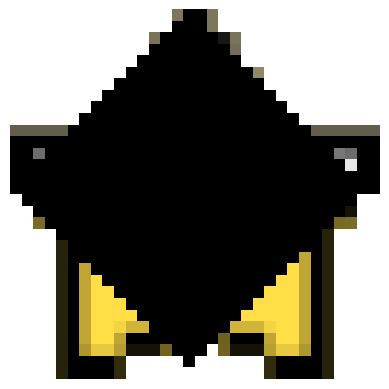

In [154]:
imagen = plt.imread("estrella (2).png")
imagen = imagen[:, :, :3]
print("Dimensiones de la imagen: ", imagen.shape)
nf, nc = imagen.shape[0], imagen.shape[1]

def rombo(i,j,tensor,v):
  tensor[i,j,:] = tensor[0, v, :]

  if (i==nf-1 and j==v):
    plt.imshow(tensor)
    plt.axis('off')
  elif (j==(nf-1)-abs(v-i)):
    rombo(i+1,abs(v-(i+1)),tensor,v)
  else:
    rombo(i,j+1,tensor,v )

if (nf%2==0): nf = nf-1
v = (nf-1)//2
rombo(0,v,imagen.copy(),v)


Triangulo isoceles

Dimensiones de la imagen:  (32, 32, 3)


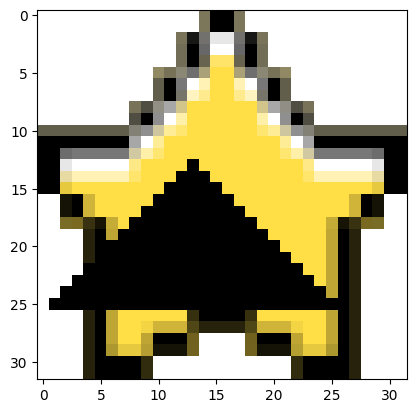

In [162]:
imagen = plt.imread("estrella (2).png")
imagen = imagen[:, :, :3]
print("Dimensiones de la imagen: ", imagen.shape)
start_row, start_col = 26, 1
nf, nc = start_row//2, (nf*2-1)
ima = imagen.copy()


def triangulo(i,j):
  
  if (start_row+i-nf<imagen.shape[0] and start_col+j<imagen.shape[1]):
    ima[start_row+i-nf, start_col+j, :] = ima[nf-1, 0, :]
  
  if ((i == nf - 1 and j == nc - 1) or start_row+i-nf>imagen.shape[0] or start_col+j>imagen.shape[1]):
    plt.imshow(ima)
    return ima
  elif i==nf-1: 
    triangulo(abs((j+1)-(nf-1)),j+1)
  else:
    triangulo(i+1,j)

triangulo(nf-1, 0)
plt.show()  # Mostrar la figura final

Triangulo rectangulo

Dimensiones de la imagen:  (32, 32, 3)


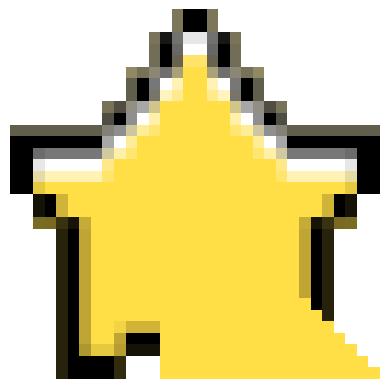

In [164]:
imagen = plt.imread("estrella (2).png")
imagen = imagen[:, :, :3]
print("Dimensiones de la imagen: ", imagen.shape)
nf, nc = imagen.shape[0], imagen.shape[1]

def triangulo_rectangulo(i,j,tensor):
  tensor[i, j, :] = tensor[pos, pos, :]
  if (i==nf-1 and j==nf-1): #CASO BASE
    plt.imshow(tensor)
    plt.axis('off')
    plt.show()
    return tensor
  elif i==nf-1:#SINGULARIDADES
    triangulo_rectangulo(j+1,j+1, tensor)
  else:
    triangulo_rectangulo(i+1, j,tensor)

pos = np.random.randint(0, nf)
triangulo_rectangulo(pos,pos,imagen.copy())